In [25]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
df = pd.read_csv("contingent.csv")
df["time"] = df["Time"] # annoying

# we try to model how the stock price changes with respect to the dummies
df["delta"] = df["close"] - df["open"]
df = df.drop(columns=["close", "high", "low", "volume", "Time"])
df

open    dummy1    dummy2    dummy3    dummy4    dummy5    dummy6  \
0     3.20000  2.655044  3.674785  3.651247 -2.945802  5.121872  5.530026   
1     3.20570  2.682623  3.714033  3.575072 -2.957660  5.161131  5.455234   
2     3.19490  2.652753  3.732948  3.557472 -2.925496  5.150932  5.311811   
3     3.14360  2.703510  3.746602  3.568385 -2.896157  5.075624  5.089443   
4     3.15140  2.669914  3.758331  3.528955 -2.852926  4.959830  4.720096   
...       ...       ...       ...       ...       ...       ...       ...   
9795  0.67057  1.638699  2.669022  3.988210 -0.634237  0.488931  0.255976   
9796  0.67284  1.641330  2.656612  3.994541 -0.635483  0.543777  0.106418   
9797  0.67212  1.627738  2.654555  3.989373 -0.630554  0.600317  0.095897   
9798  0.66918  1.636918  2.645639  3.981020 -0.640458  0.658387  0.134592   
9799  0.66211  1.649415  2.651239  3.991798 -0.626227  0.712435  0.206877   

        dummy7    dummy8    dummy9    dummy10  dummy11  dummy12   dummy13  \
0     1.325333  0.641854 -0.032000  47.579916  0.04770  3.09160 -3.200000   
1     1.055526  2.621039 -0.032057  50.381682 -0.06370  3.05130 -3.205700   
2     1.070436  6.150731 -0.031949  52.550016 -0.04050  3.02590 -3.194900   
3     0.965386  2.653508 -0.031436  53.640637 -0.01790  2.98650 -3.143600   
4     1.616049  3.178265 -0.002914  54.862580 -0.01320  2.97500 -2.243590   
...        ...       ...       ...        ...      ...      ...       ...   
9795  0.670264  7.267435 -0.006695   8.274947 -0.04083  0.62617 -0.669069   
9796  0.490327  6.648925 -0.006718   8.374582 -0.02262  0.62917 -0.671344   
9797  0.928783  7.740056 -0.004246   8.341736 -0.02138  0.62962 -0.314378   
9798  0.218886  6.655093 -0.006692   8.272220 -0.02918  0.62857 -0.669180   
9799  1.159868  8.517146 -0.001702   7.995821 -0.02248  0.62301  0.062143   

      dummy14  time    delta  
0    -1.11000   100  0.00000  
1    -1.06010   101  0.00000  
2    -1.09950   102  0.00000  
3    -1.03960   103  0.00000  
4    -0.97890   104 -0.02750  
...       ...   ...      ...  
9795 -0.07548  9895 -0.00001  
9796 -0.07826  9896 -0.00001  
9797 -0.07833  9897 -0.00238  
9798 -0.07863  9898  0.00000  
9799 -0.05522  9899 -0.00473  

[9800 rows x 17 columns]

In [44]:
# convenience function for plotting stuff

dummy_count = 14
def dummyplot(plot_fn, dummy_axis, against, **kwargs2):
    fig, ax = plt.subplots(nrows=dummy_count, figsize=(10, 10 * dummy_count))
    kwargs = {}
    kwargs["data"] = df
    kwargs["y" if dummy_axis == "x" else "x"] = against
    for i in range(dummy_count):
        kwargs[dummy_axis] = f"dummy{i + 1}"
        kwargs["ax"] = ax[i]
        plot_fn(**kwargs, **kwargs2)

# Does `delta` depend on the dummies?

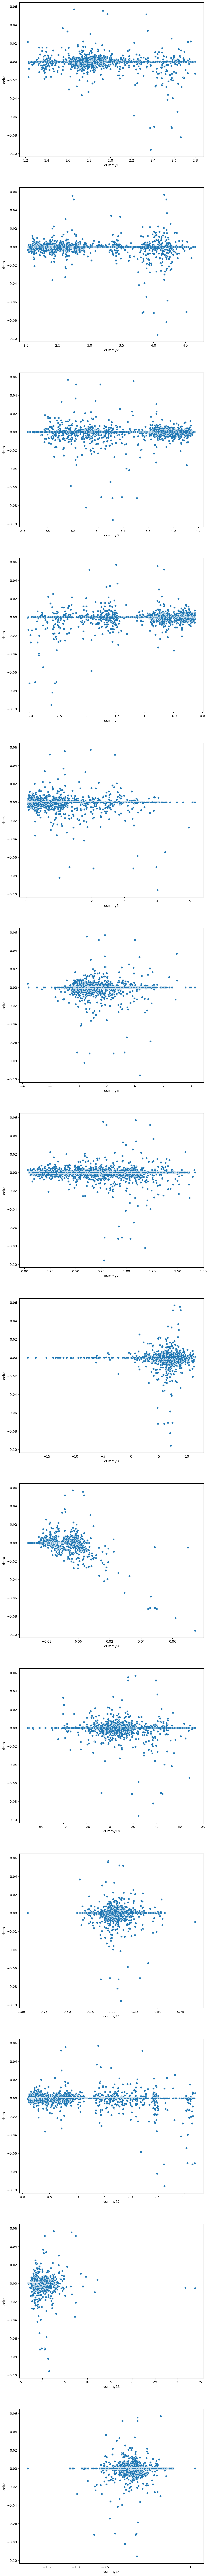

In [47]:
dummyplot(sb.scatterplot, "x", "delta")

Clearly there is no real correlation between any of the dummy variables directly and how the stock prices change over time. Let's look at time variations of the dummies.

# Time variation of dummy variables

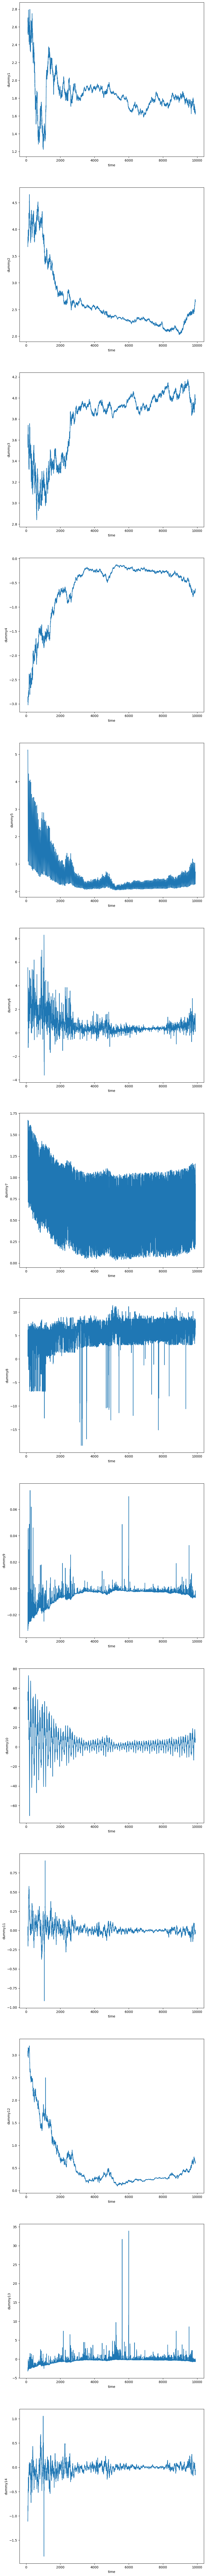

In [48]:
dummyplot(sb.lineplot, "y", "time")

For everything that changes "sanely" with respect to time, let us create a diff column for it.

# Diffing some dummies